Ridge Regression

In [5]:
%pip install scikit-learn
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV
ridge=Ridge()

params={'alpha':[1e-15,1e-10,1e-8,1e-3,1e-2,1,5,10,20]}
ridge_regressor=GridSearchCV(ridge,params,scoring='neg_mean_squred_error',cv=5)
                             
ridge_regressor.fit(x,y)

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.3.1 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


NameError: name 'x' is not defined

In [6]:
%pip install scikit-learn
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Ridge,Lasso
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.3.1 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [8]:
from sklearn.datasets import fetch_california_housing

california = fetch_california_housing()
x = pd.DataFrame(california.data, columns=california.feature_names)
y = california.target

print(x.head())

   MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  Latitude  \
0  8.3252      41.0  6.984127   1.023810       322.0  2.555556     37.88   
1  8.3014      21.0  6.238137   0.971880      2401.0  2.109842     37.86   
2  7.2574      52.0  8.288136   1.073446       496.0  2.802260     37.85   
3  5.6431      52.0  5.817352   1.073059       558.0  2.547945     37.85   
4  3.8462      52.0  6.281853   1.081081       565.0  2.181467     37.85   

   Longitude  
0    -122.23  
1    -122.22  
2    -122.24  
3    -122.25  
4    -122.25  


In [ ]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

#split the data into training and testing sets

In [10]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
X_train_scaled = scaler.fit_transform(x_train)
X_test_scaled=scaler.transform(x_test)

In [11]:
ridge=Ridge(alpha=1.0)
ridge.fit(X_train_scaled,y_train)
y_pred_ridge=ridge.predict(X_test_scaled)
ridge_mse=mean_squared_error(y_test,y_pred_ridge)
print(f'Ridge Regression MSE:{ridge_mse}')

Ridge Regression MSE:0.555854858943597


In [12]:
lasso=Lasso(alpha=1.0)
lasso.fit(X_train_scaled,y_train)
y_pred_lasso=lasso.predict(X_test_scaled)
lasso_mse=mean_squared_error(y_test,y_pred_lasso)
print(f'Lasso Regression MSE:{lasso_mse}')

Lasso Regression MSE:1.3106960720039365


In [13]:
ridge_params={'alpha':[1e-4,1e-3,1e-2,0.1,1,10,100]}
ridge_grid=GridSearchCV(Ridge(),ridge_params,scoring='neg_mean_squared_error',cv=5)
ridge_grid.fit(X_train_scaled,y_train)

print(f"Best Alpha for Ridge: {ridge_grid.best_params_['alpha']}")
print(f"Best MSE for Ridge: {abs(ridge_grid.best_score_)}")

Best Alpha for Ridge: 0.1
Best MSE for Ridge: 0.5192651994657134


In [14]:
lasso_params={'alpha':[1e-4,1e-3,1e-2,0.1,1,10,100]}
lasso_grid=GridSearchCV(Lasso(),lasso_params,scoring='neg_mean_squared_error',cv=5)
lasso_grid.fit(X_train_scaled,y_train)

print(f"Best Alpha for Lasso: {lasso_grid.best_params_['alpha']}")
print(f"Best MSE for Lasso: {abs(lasso_grid.best_score_)}")

#we use gridsearchcv for finding the best value possible for alpha 
#Here, cv stands for Cross-validation

Best Alpha for Lasso: 0.001
Best MSE for Lasso: 0.5192468796642637


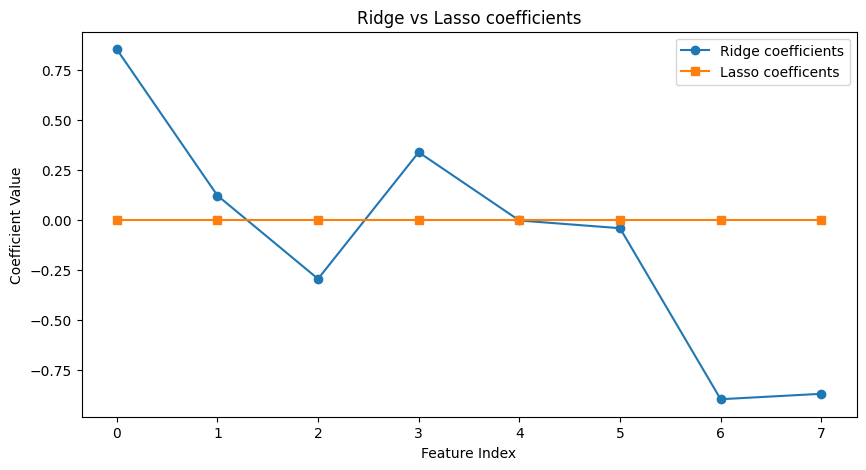

In [16]:
plt.figure(figsize=(10,5))

#after training the model the ridge regression coefficient's value is stored
plt.plot(ridge.coef_,label="Ridge coefficients",marker='o')
plt.plot(lasso.coef_,label="Lasso coefficents",marker='s')
plt.xlabel("Feature Index")
plt.ylabel("Coefficient Value")
plt.title("Ridge vs Lasso coefficients")

plt.legend()
plt.show()
